In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, cutflow
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,
Comm: tls://192.168.198.19:8786,Workers: 0
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [3]:
samples_4mu = [
    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_0p8mm",
    "4Mu_500GeV_5p0GeV_8p0mm",
    "4Mu_500GeV_5p0GeV_40p0mm",
    "4Mu_500GeV_5p0GeV_80p0mm",   
]


samples_2mu = [
    
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_0p8mm",
    "2Mu2E_500GeV_5p0GeV_8p0mm",
    "2Mu2E_500GeV_5p0GeV_40p0mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",   
]

samples_bkg = [
    "TTJets",
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", max_files=-1, location_cfg="signal_4mu_v10.yaml")
fileset_2mu = utilities.make_fileset(samples_2mu, "llpNanoAOD_v2", max_files=-1, location_cfg="signal_2mu2e_v10.yaml")
fileset_bkg = utilities.make_fileset(samples_bkg, "llpNanoAOD_v2", max_files=-1, location_cfg="backgrounds.yaml")

fileset_4mu['TTJets'] = fileset_bkg['TTJets']
fileset_2mu['TTJets'] = fileset_bkg['TTJets']

runner = processor.Runner(
    executor=processor.DaskExecutor(client=client),
    # executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
#    maxchunks=10,
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["lj_iso_base"],
)

output_4mu = runner.run(fileset_4mu, treename="Events", processor_instance=p)
output_2mu = runner.run(fileset_2mu, treename="Events", processor_instance=p)

out_4mu = output_4mu["out"]
out_2mu = output_2mu["out"]

/opt/conda/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.0. Please consider upgrading.
  warnings.warn(


In [5]:
samples_4mu = [
    "TTJets",
    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_0p8mm",
    "4Mu_500GeV_5p0GeV_8p0mm",
    "4Mu_500GeV_5p0GeV_40p0mm",
    "4Mu_500GeV_5p0GeV_80p0mm",   
]


samples_2mu = [
    "TTJets",
    
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_0p8mm",
    "2Mu2E_500GeV_5p0GeV_8p0mm",
    "2Mu2E_500GeV_5p0GeV_40p0mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",   
]

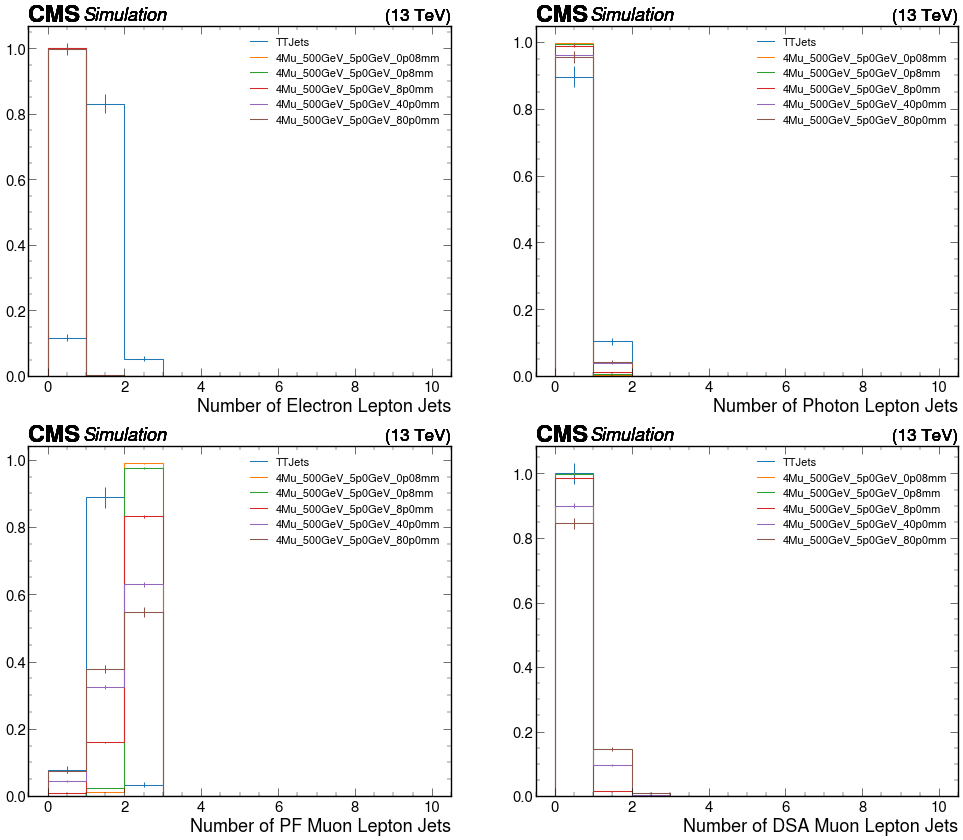

In [6]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["electron_lj_n"][channels[0], :], density=True)
plt.legend(samples_4mu, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["photon_lj_n"][channels[0], :], density=True)
plt.legend(samples_4mu, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["pfmu_lj_n"][channels[0], :], density=True)
plt.legend(samples_4mu, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["dsamu_lj_n"][channels[0], :], density=True)
plt.legend(samples_4mu, prop={'size': 16})

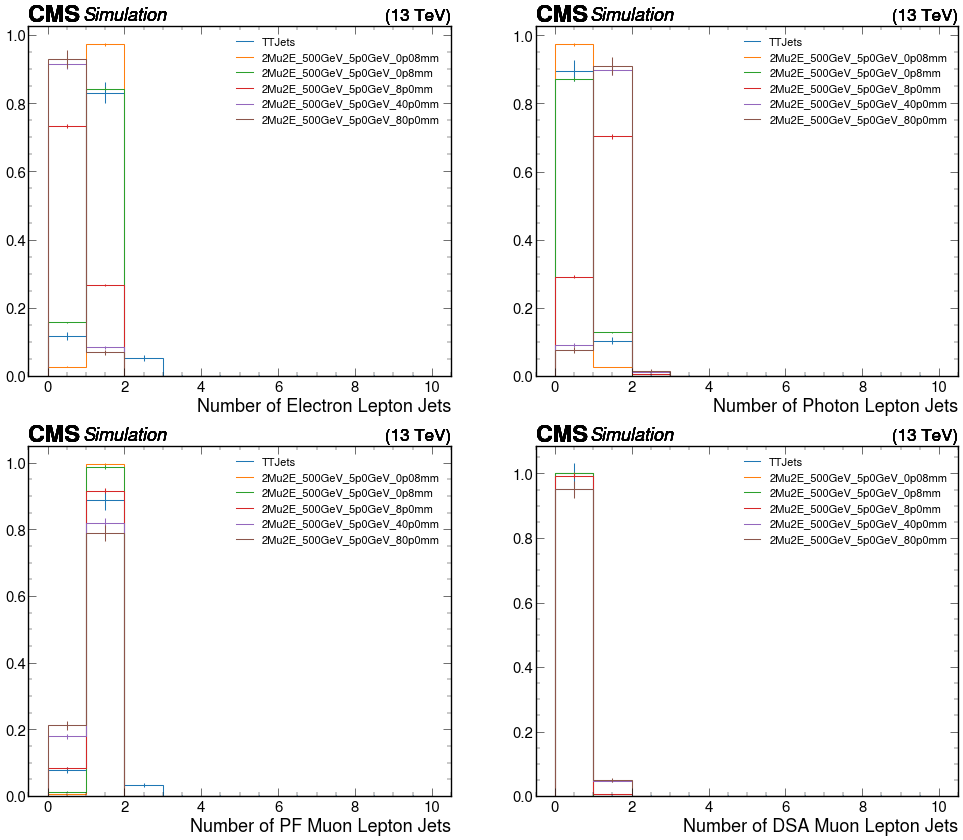

In [7]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["electron_lj_n"][channels[0], :], density=True)
plt.legend(samples_2mu, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["photon_lj_n"][channels[0], :], density=True)
plt.legend(samples_2mu, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["pfmu_lj_n"][channels[0], :], density=True)
plt.legend(samples_2mu, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["dsamu_lj_n"][channels[0], :], density=True)
plt.legend(samples_2mu, prop={'size': 16})

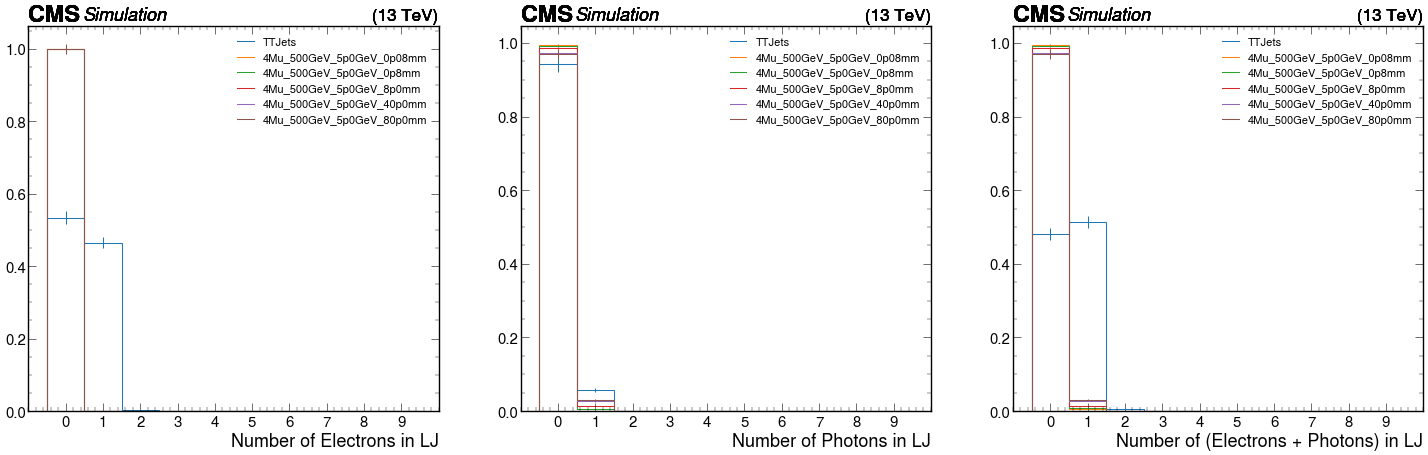

In [8]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_electronN"][channels[0], :], density=True)
plt.legend(samples_4mu, prop={'size': 16})

plt.subplot(1,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_photonN"][channels[0], :], density=True)
plt.legend(samples_4mu, prop={'size': 16})

plt.subplot(1,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_electronPhotonN"][channels[0], :], density=True)
plt.legend(samples_4mu, prop={'size': 16})

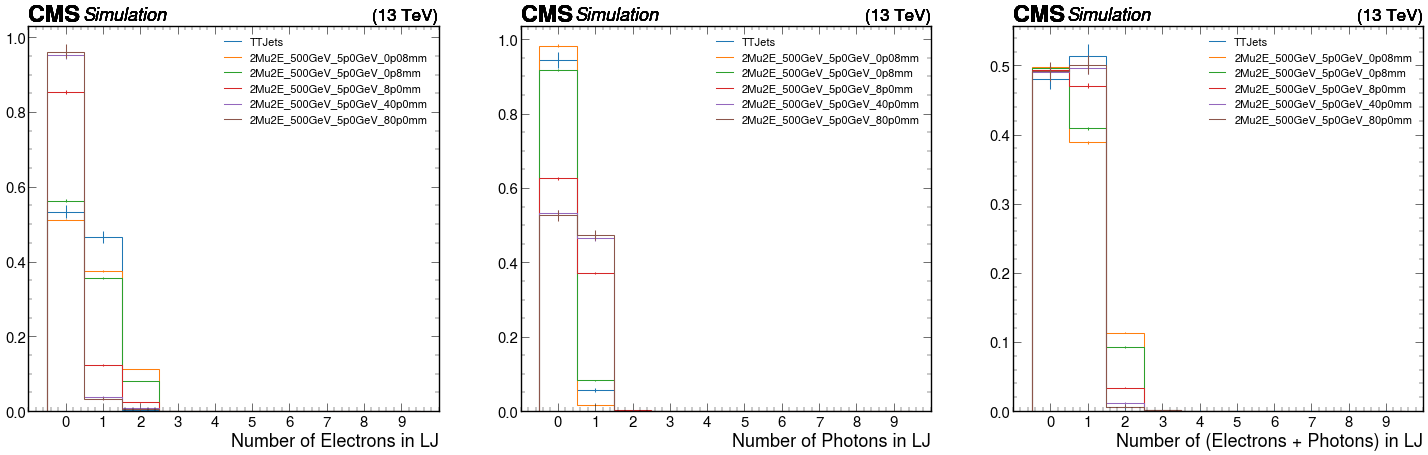

In [9]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_electronN"][channels[0], :], density=True)
plt.legend(samples_2mu, prop={'size': 16})

plt.subplot(1,3,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_photonN"][channels[0], :], density=True)
plt.legend(samples_2mu, prop={'size': 16})

plt.subplot(1,3,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_electronPhotonN"][channels[0], :], density=True)
plt.legend(samples_2mu, prop={'size': 16})

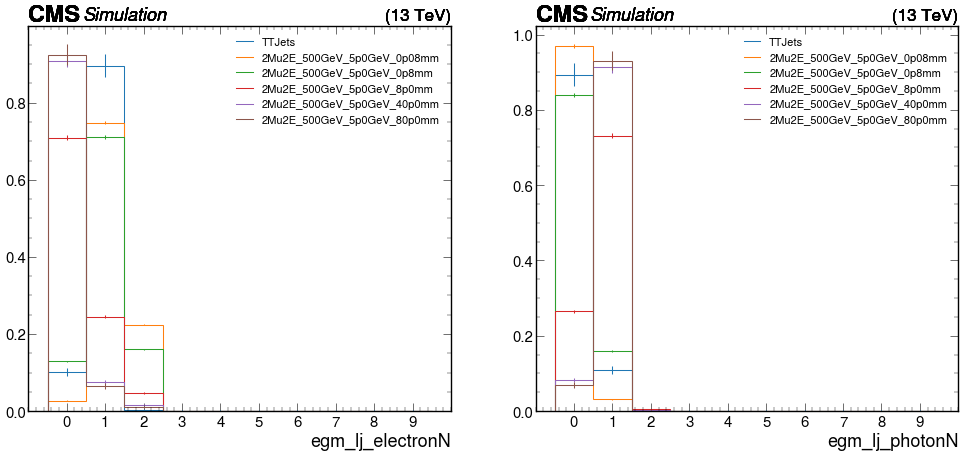

In [18]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_lj_electronN"][channels[0], :], density=True)
plt.legend(samples_2mu, prop={'size': 16})

plt.subplot(1,2,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_lj_photonN"][channels[0], :], density=True)
plt.legend(samples_2mu, prop={'size': 16})

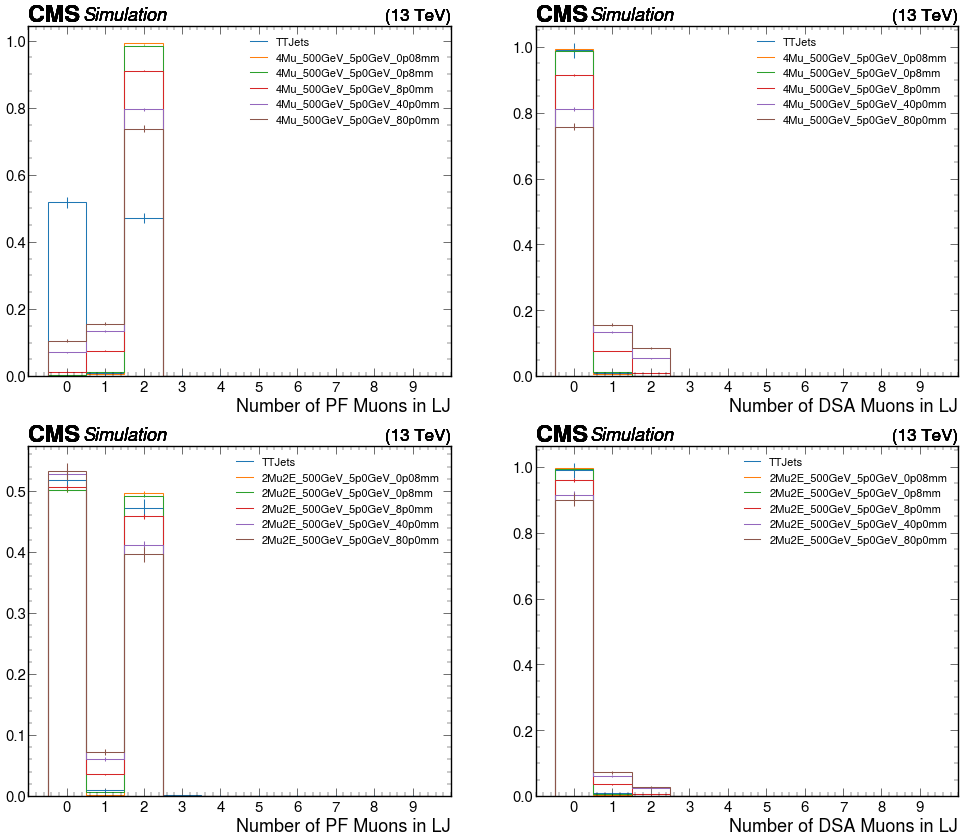

In [10]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_pfMuN"][channels[0], :], density=True)
plt.legend(samples_4mu, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_dsaMuN"][channels[0], :], density=True)
plt.legend(samples_4mu, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_pfMuN"][channels[0], :], density=True)
plt.legend(samples_2mu, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_dsaMuN"][channels[0], :], density=True)
plt.legend(samples_2mu, prop={'size': 16})

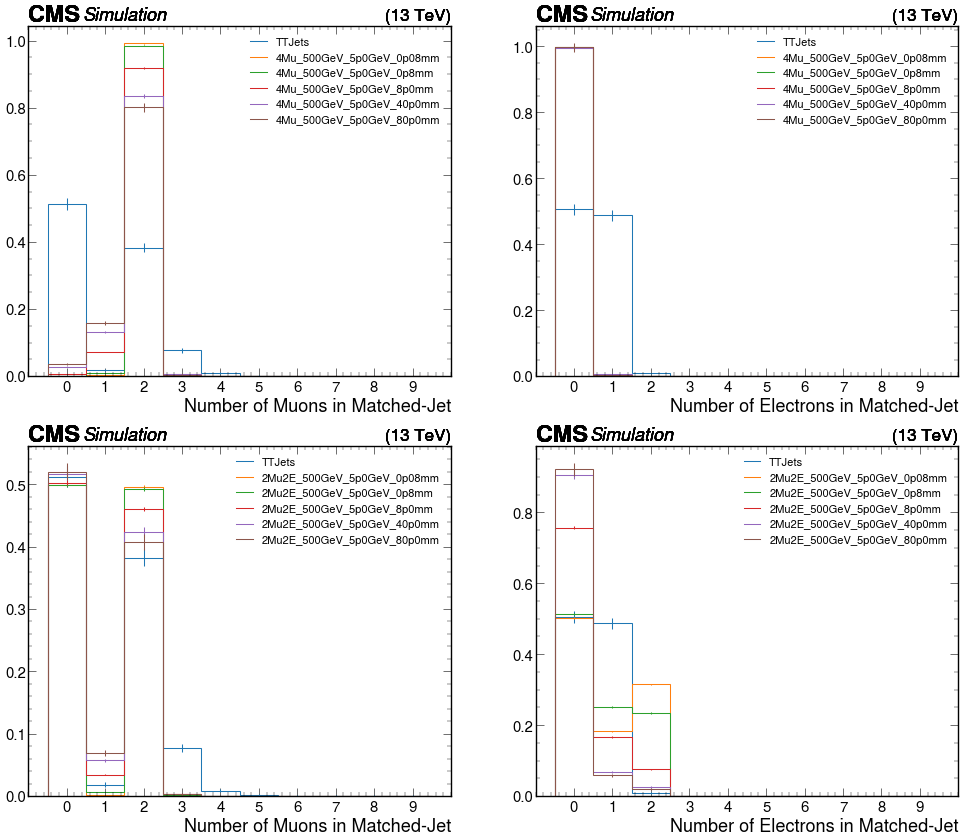

In [11]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_matchedjet_nmuon"][channels[0], :], density=True)
plt.legend(samples_4mu, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["lj_matchedjet_nelectron"][channels[0], :], density=True)
plt.legend(samples_4mu, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_matchedjet_nmuon"][channels[0], :], density=True)
plt.legend(samples_2mu, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["lj_matchedjet_nelectron"][channels[0], :], density=True)
plt.legend(samples_2mu, prop={'size': 16})

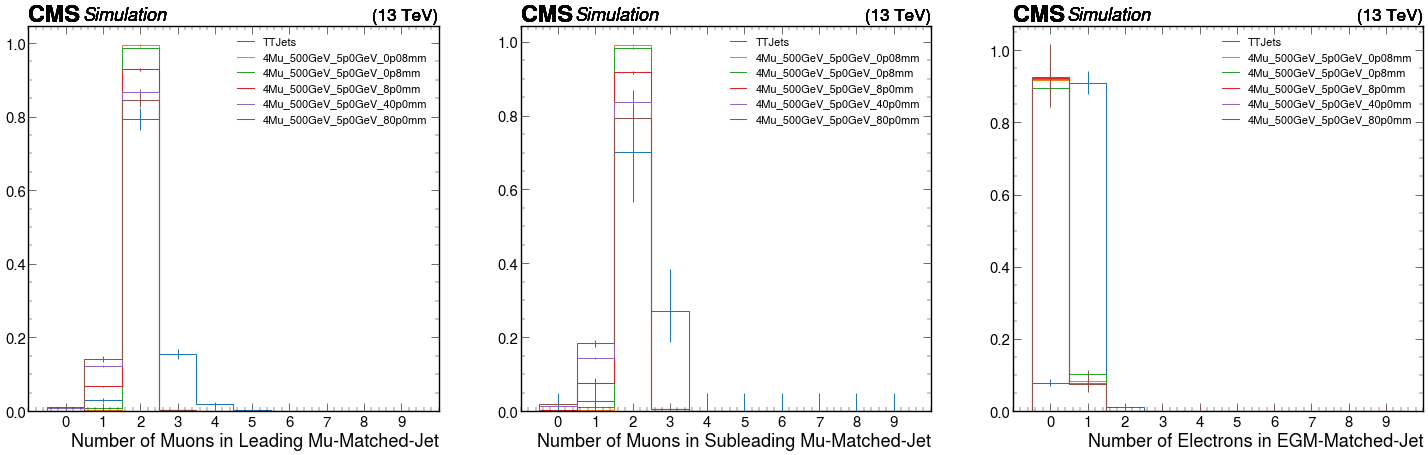

In [12]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_lj_matchedjet_nmuon"][channels[0], :], density=True)
plt.legend(samples_4mu, prop={'size': 16})

plt.subplot(1,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_lj_matchedjet_nmuon"][channels[0], :], density=True)
plt.legend(samples_4mu, prop={'size': 16})

plt.subplot(1,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["egm_lj_matchedjet_nelectron"][channels[0], :], density=True)
plt.legend(samples_4mu, prop={'size': 16})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale


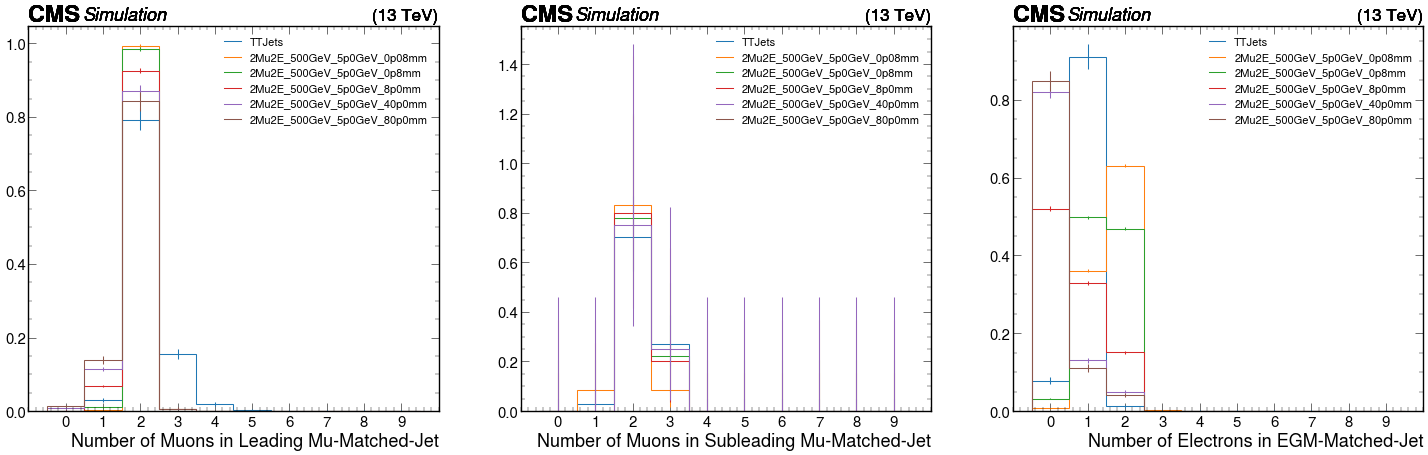

In [13]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_lj_matchedjet_nmuon"][channels[0], :], density=True)
plt.legend(samples_2mu, prop={'size': 16})

plt.subplot(1,3,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleading_mu_lj_matchedjet_nmuon"][channels[0], :], density=True)
plt.legend(samples_2mu, prop={'size': 16})

plt.subplot(1,3,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_lj_matchedjet_nelectron"][channels[0], :], density=True)
plt.legend(samples_2mu, prop={'size': 16})

In [14]:
for sample in samples_2mu:
    print(sample)
    out_2mu[sample]["cutflow"]["base"].print_table(fraction=False)
    print()
    print()

TTJets
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection            9219850.0    9219850.0
pass triggers            161866.0     161866.0
PV filter               9200665.0     161527.0
>=2 LJs                   49494.0        956.0


2Mu2E_500GeV_5p0GeV_0p08mm
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection             195206.0     195206.0
pass triggers             80058.0      80058.0
PV filter                194264.0      79700.0
>=2 LJs                   98518.0      41141.0


2Mu2E_500GeV_5p0GeV_0p8mm
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection             190498.0     190498.0
pass triggers             77002.0      77002.0
PV filter                186324.0      75181.0
>=2 LJs                   81869.0      33516.0


2Mu2E_500GeV_5p0GeV_8p0mm
cut name         individual cut N    all cut N
-------------  

In [15]:
for sample in samples_2mu:
    print(sample)
    out_2mu[sample]["cutflow"]["base"].print_table(fraction=True)
    print()
    print()

TTJets
cut name         individual %    cut %
-------------  --------------  -------
No selection            100.0    100.0
pass triggers             1.8      1.8
PV filter                99.8      1.8
>=2 LJs                   0.5      0.0


2Mu2E_500GeV_5p0GeV_0p08mm
cut name         individual %    cut %
-------------  --------------  -------
No selection            100.0    100.0
pass triggers            41.0     41.0
PV filter                99.5     40.8
>=2 LJs                  50.5     21.1


2Mu2E_500GeV_5p0GeV_0p8mm
cut name         individual %    cut %
-------------  --------------  -------
No selection            100.0    100.0
pass triggers            40.4     40.4
PV filter                97.8     39.5
>=2 LJs                  43.0     17.6


2Mu2E_500GeV_5p0GeV_8p0mm
cut name         individual %    cut %
-------------  --------------  -------
No selection            100.0    100.0
pass triggers            37.5     37.5
PV filter                97.6     36.5
>=2 LJs    

In [16]:
for sample in samples_4mu:
    print(sample)
    out_4mu[sample]["cutflow"]["base"].print_table(fraction=False)
    print()
    print()

TTJets
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection            9219850.0    9219850.0
pass triggers            161866.0     161866.0
PV filter               9200665.0     161527.0
>=2 LJs                   49494.0        956.0


4Mu_500GeV_5p0GeV_0p08mm
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection             274199.0     274199.0
pass triggers            255236.0     255236.0
PV filter                273006.0     254138.0
>=2 LJs                  238610.0     222951.0


4Mu_500GeV_5p0GeV_0p8mm
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection             234641.0     234641.0
pass triggers            218089.0     218089.0
PV filter                229228.0     213056.0
>=2 LJs                  196217.0     179593.0


4Mu_500GeV_5p0GeV_8p0mm
cut name         individual cut N    all cut N
-------------  ------

In [17]:
for sample in samples_4mu:
    print(sample)
    out_4mu[sample]["cutflow"]["base"].print_table(fraction=True)
    print()
    print()

TTJets
cut name         individual %    cut %
-------------  --------------  -------
No selection            100.0    100.0
pass triggers             1.8      1.8
PV filter                99.8      1.8
>=2 LJs                   0.5      0.0


4Mu_500GeV_5p0GeV_0p08mm
cut name         individual %    cut %
-------------  --------------  -------
No selection            100.0    100.0
pass triggers            93.1     93.1
PV filter                99.6     92.7
>=2 LJs                  87.0     81.3


4Mu_500GeV_5p0GeV_0p8mm
cut name         individual %    cut %
-------------  --------------  -------
No selection            100.0    100.0
pass triggers            92.9     92.9
PV filter                97.7     90.8
>=2 LJs                  83.6     76.5


4Mu_500GeV_5p0GeV_8p0mm
cut name         individual %    cut %
-------------  --------------  -------
No selection            100.0    100.0
pass triggers            91.4     91.4
PV filter                97.1     88.7
>=2 LJs          